<a href="https://colab.research.google.com/github/rewpak/AI-works/blob/main/Probabilistic_Inference_Iris_Na%C3%AFve_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4. Probabilistic Inference
# Task 4.1 Iris Classification Using Naïve Bayes
## Problem Descriptions
In this lab, we're using a method called Naïve Bayes to classify iris flowers based on their petal and sepal features. The dataset is straightforward, containing five attributes: four flower measurements (sepal length, sepal width, petal length, and petal width) and three iris species. There are a total of 150 data records, with 50 for each species.

If we apply the Naïve Bayes method, we can frame the problem like this:


*  𝑃(𝑐𝑖) - prior probability of each iris type
*  𝑃(𝑐𝑖| 𝑓1,𝑓2, 𝑓3,𝑓4) - posterior probability, where *i*= 1, 2, 3 (iris species)
*  𝑃(𝑓1 |𝑐𝑖), 𝑃(𝑓2 |𝑐𝑖), 𝑃(𝑓3 |𝑐𝑖), 𝑃(𝑓4 |𝑐𝑖) - conditional probability

Assuming features are independent within each species class:
𝑃(𝑐𝑖 |𝑓1,𝑓2,𝑓3,𝑓4)=𝛼𝑃(𝑓1|𝑐𝑖) 𝑃(𝑓2|𝑐𝑖)𝑃(𝑓3 |𝑐𝑖), 𝑃(𝑓4 |𝑐𝑖) 𝑃(𝑐𝑖)


![picture](https://drive.google.com/uc?export=view&id=1394VIhCUlBr-Cgn5dYUtHjOvfituLZ3-)


## Implementation and Results

In [ ]:
!pip install sklearn
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches


  Using cached sklearn-0.0.post10.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=c4864d39f7bdeb71686582adbcbc50a06afe6c3e0070b2fcaf63e3631619dc42
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn


In [ ]:
# We only use two features (sepal and petaal length)
iris = datasets.load_iris()
X = iris.data
# X = iris.data[:, [0,2]]
Y = iris.target

# split the dataset into training (80%) and testing (20%), and fit the data into the naive Bayes model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Use the naive Bayes model we just built to predict on the testing set, and display the results.
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Prior:\n", nb.class_prior_)
print("Mean:\n", nb.theta_)
variance = np.var(X_train, axis=0)
print("Variance:\n", variance)


Accuracy: 1.0
Confusion Matrix:
 [[13  0  0]
 [ 0 10  0]
 [ 0  0  7]]
Prior:
 [0.30833333 0.33333333 0.35833333]
Mean:
 [[5.04864865 3.45405405 1.48378378 0.24594595]
 [5.9825     2.82       4.31       1.345     ]
 [6.55116279 2.9627907  5.53023256 2.01860465]]
Variance:
 [0.64099722 0.17788889 2.99149931 0.56766042]


<ipython-input-14-8b03251f3c58>:9: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)


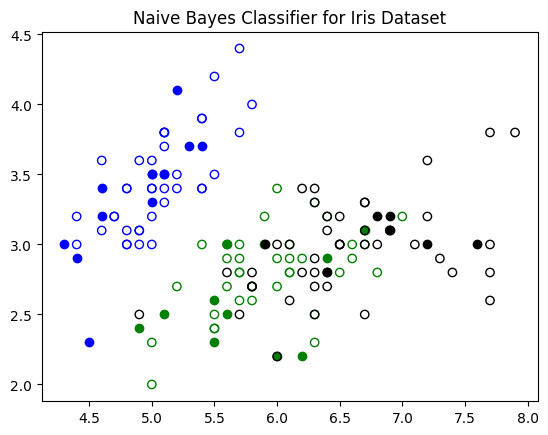

In [ ]:
colours = 'bgk'
for i, colour in enumerate(colours):
  train_data = X_train[Y_train == i]
  plt.scatter(train_data[:,0], train_data[:,1], marker='o', facecolors='none', edgecolors=colour)
  test_data = X_test[Y_pred == i]
  plt.scatter(test_data[:,0], test_data[:,1], marker='o', facecolors=colour, edgecolors=colour)

error_data = X_test[Y_pred != Y_test]
plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)

# ellipse = patches.Ellipse(xy=nb.theta_[0], width=nb.sigma_[0][0]*10, height=nb.sigma_[0][1]*10, edgecolor='b', fc='none')
# # ellipse = patches.Ellipse(xy=(5,2), width=2, height=1)
# ax = plt.gca()
# ax.add_patch(ellipse)

plt.title("Naive Bayes Classifier for Iris Dataset")
plt.show()

## Discussions

In this task, we employed a classification model that achieved perfect accuracy at 100%. It correctly identified all instances in classes 1 and 2 and in class 3. The dataset exhibits a relatively balanced distribution between the three classes. Examining the means, we observed characteristics measurements for each class, with class 1 having the smallest values and class 3 the largest. Furthermore, the variance indicates the distribution of the data, with the third feature showing the highest variability. This excellent performance emphasizes the effectiveness of the chosen classification method. According to the distributions of the data in the 2D space, it is obvious that there are no errors